In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame

url ="https://www.psx.com.pk/market-summary/"

ss = requests.get(url)
print(ss)
obj = BeautifulSoup(ss.content,'lxml')
# obj.text


<Response [200]>


In [2]:
data = obj.findAll("div",{"class":"table-responsive"})

In [3]:
rows = obj.find_all('td')
row_data = []
for i in range(30,len(rows)):
    row_data.append(rows[i].text)

row1 = row_data[8:16:1]
j = 4   #row nUm
k = 8   #slicing start index
l = 16    #slicing end index
row4 = []
for i in range(k,len(row_data)):
    
    k =l
    l=l+8
    row4.append(row_data[k:l:1])



In [4]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [6]:
filtered_rows = []
for row in row4:
    if(row not in filtered_rows):
        filtered_rows.append(row)
    else:
        continue

In [7]:
len(filtered_rows)

410

In [41]:
# for i in range(len(filtered_rows)):
#     if(filtered_rows[i][0] == 'SCRIP'):
#         filtered_rows.remove(filtered_rows[i])

In [8]:
len(row4)

3536

In [11]:
for i in range(len(filtered_rows)):
    print(filtered_rows[i])

['Atlas Honda Limited.(XD) ', '368.00', '386.00', '386', '385', '385', '  17', '300']
['Dewan Farooque Motors Limited [ DEFAULTER SEGMENT ]', '7.02', '7.13', '7.13', '6.7', '6.79', '  -.23', '155,500']
['Ghandhara Industries Ltd. ', '134.67', '134.00', '141', '132', '139', '  4.33', '787,300']
['Ghandhara Nissan Ltd. ', '76.91', '76.98', '80.75', '75', '79.71', '  2.8', '1,065,500']
['Ghani Automobile Industries Ltd. ', '4.62', '4.90', '4.9', '4.56', '4.81', '  .19', '53,500']
['Hino Pak Motor Limeted. ', '466.79', '447.10', '476.7', '447.1', '476.70', '  9.91', '200']
['Honda Atlas Cars (Pak) Ltd. ', '210.21', '210.01', '214', '209', '211.31', '  1.1', '167,400']
['Indus Motor Company Ltd. ', '1,181.10', '1178.00', '1199.99', '1178', '1184.54', '  3.44', '19,300']
['Millat Tractors Limited. ', '699.51', '702.00', '704', '690', '698.35', '  -1.16', '40,500']
['Pak Suzuki Motors Co Ltd. ', '244.09', '245.00', '254.7', '237.7', '240.25', '  -3.84', '184,200']
['Sazgar Engineering Works L

In [9]:
with open('Stocks.csv','a') as csv_file:
    spamwriter = csv.writer(csv_file)
    spamwriter.writerows(filtered_rows)

In [10]:
with open('Stocks.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    rows = list(csv_reader)
    

In [11]:
filter = ['SCRIP','LDCP','OPEN','HIGH','LOW','CURRENT','CHANGE','VOLUME']
filter

['SCRIP', 'LDCP', 'OPEN', 'HIGH', 'LOW', 'CURRENT', 'CHANGE', 'VOLUME']

In [12]:
for i in range(0,len(rows)):
    
    if(filter[0] in rows[i]):
        continue
    else:
        with open('Stock.csv','a') as csv_file:
            spamwriter = csv.writer(csv_file)
            spamwriter.writerow(rows[i])
            
        

In [13]:
data = pd.read_csv('Stock.csv',names=filter)

In [14]:
data.head()

,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
0,Dewan Farooque Motors Limited [ DEFAULTER SEGM...,5.78,5.65,5.79,5.51,5.61,-0.17,"45,500"
1,Ghandhara Nissan Ltd.,48.58,48.60,49.39,48.00,48.28,-0.30,"58,500"
2,Ghani Automobile Industries Ltd.,3.75,3.75,3.84,3.71,3.74,-0.01,"16,500"
3,Hino Pak Motor Limeted.,290,290.00,290.00,281.50,281.75,-8.25,600
4,Honda Atlas Cars (Pak) Ltd.,136.1,136.25,138.00,134.50,135.71,-0.39,"62,400"


In [25]:
data.tail()


,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
21914,SSGC-DEC,21.03,21.00,21.45,21.00,21.32,0.29,"140,500"
21915,SEARL-DEC,201.09,203.70,206.40,200.10,205.00,3.91,"884,500"
21916,TRG-DEC,24.78,24.70,25.45,24.42,25.35,0.57,"5,929,000"
21917,UBL-DEC,170.13,169.39,170.00,168.00,170.00,-0.13,"18,000"
21918,UNITY-DEC,13.01,13.00,13.47,12.90,13.35,0.34,"8,578,500"


In [26]:
data.describe()

,OPEN,HIGH,LOW,CURRENT,CHANGE
count,21919.000000,21919.000000,21919.000000,21919.000000,21919.000000
mean,133.405753,137.266757,133.830565,137.415489,1.337401
std,510.310564,525.743853,515.094136,532.062221,17.939840
min,0.000000,0.000000,0.000000,0.350000,-345.000000
25%,10.460000,11.000000,10.460000,10.950000,-0.170000
50%,29.640000,31.280000,29.940000,31.000000,0.120000
75%,98.200000,101.000000,98.980000,100.360000,1.000000
max,7245.000000,7245.000000,7245.000000,7245.000000,345.000000


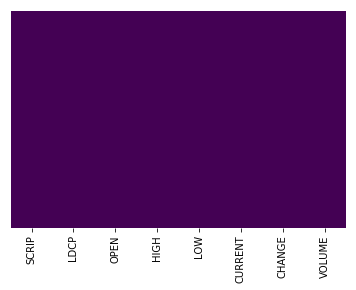

In [27]:
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
data.size

175352

In [162]:
# import pandas_profiling

In [30]:
pandas_profiling.ProfileReport(data)

Number of variables,8
Number of observations,21919
Total Missing (%),0.0%
Total size in memory,1.3 MiB
Average record size in memory,64.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,3


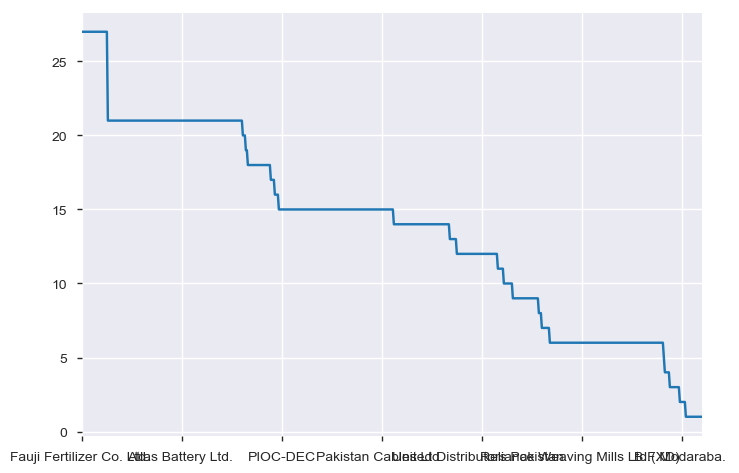

In [29]:
data['SCRIP'].value_counts().plot(kind='line')

In [40]:
corr = data.corr()
corr
# ax = sb.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sb.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

,OPEN,HIGH,LOW,CURRENT,CHANGE
OPEN,1.000000,0.982648,0.982006,0.966719,0.441359
HIGH,0.982648,1.000000,0.999745,0.983952,0.436540
LOW,0.982006,0.999745,1.000000,0.983781,0.433598
CURRENT,0.966719,0.983952,0.983781,1.000000,0.432580
CHANGE,0.441359,0.436540,0.433598,0.432580,1.000000


In [27]:
data["SCRIP"].unique()`

array(['Dewan Farooque Motors Limited [ DEFAULTER SEGMENT ]',
       'Ghandhara Nissan Ltd. ', 'Ghani Automobile Industries Ltd. ',
       'Hino Pak Motor Limeted. ', 'Honda Atlas Cars (Pak) Ltd. ',
       'Indus Motor Company Ltd.(XD) ', 'Millat Tractors Limited.(XDXB) ',
       'Pak Suzuki Motors Co Ltd. ', 'Agriautos Industries Co. Ltd.(XD) ',
       'Atlas Battery Ltd. ', 'Baluchistan Wheels Ltd.(XD) ',
       'Exide Pakistan Ltd. ', 'General Tyre & Rubber Co.(XB) ',
       'Loads Limited. ', 'Thal Limited.(XD) ', 'EMCO Industries Ltd. ',
       'Pak Elektron Ltd. ', 'Siemens (Pak) Eng. Co. Ltd. ',
       'WAVES Singer Pakistan Ltd.(XB) ', 'Attock Cement Pak Ltd. ',
       'Bestway Cement Limited. ', 'Cherat Cement Co. Ltd.(XDXB) ',
       'D. G. Khan Cement Co. Ltd.(XD) ', 'Dewan Cement Limited. ',
       'Fauji Cement Co Ltd. ', 'Fecto Cement Ltd.(XD) ',
       'Flying Cement Company Ltd. ', 'Gharibwal Cement Ltd.(XD) ',
       'Javedan Corporation Ltd.(XB) ', 'Kohat Cement Co. L

In [66]:
d = pd.read_csv('Stock.csv',names=filter)

In [67]:
d

,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
0,Dewan Farooque Motors Limited [ DEFAULTER SEGM...,5.78,5.65,5.79,5.51,5.61,-0.17,"45,500"
1,Ghandhara Nissan Ltd.,48.58,48.60,49.39,48.00,48.28,-0.30,"58,500"
2,Ghani Automobile Industries Ltd.,3.75,3.75,3.84,3.71,3.74,-0.01,"16,500"
3,Hino Pak Motor Limeted.,290,290.00,290.00,281.50,281.75,-8.25,600
4,Honda Atlas Cars (Pak) Ltd.,136.1,136.25,138.00,134.50,135.71,-0.39,"62,400"
...,...,...,...,...,...,...,...,...
68643,TRG-JAN,23.33,22.80,23.20,22.17,22.17,-1.16,"6,368,000"
68644,UBL-JAN,169.14,169.00,169.00,166.20,166.20,-2.94,"7,000"
68645,UBL-DEC,169.14,168.00,168.00,165.01,165.01,-4.13,"5,500"
68646,UNITY-DEC,14.83,14.70,14.94,13.92,14.01,-0.82,"13,053,500"


In [74]:
d.isnull().sum()

SCRIP      0
LDCP       0
OPEN       0
HIGH       0
LOW        0
CURRENT    0
CHANGE     0
VOLUME     0
dtype: int64

In [72]:
print((d.isnull()))

       SCRIP   LDCP   OPEN   HIGH    LOW  CURRENT  CHANGE  VOLUME
0      False  False  False  False  False    False   False   False
1      False  False  False  False  False    False   False   False
2      False  False  False  False  False    False   False   False
3      False  False  False  False  False    False   False   False
4      False  False  False  False  False    False   False   False
...      ...    ...    ...    ...    ...      ...     ...     ...
68643  False  False  False  False  False    False   False   False
68644  False  False  False  False  False    False   False   False
68645  False  False  False  False  False    False   False   False
68646  False  False  False  False  False    False   False   False
68647  False  False  False  False  False    False   False   False

[68648 rows x 8 columns]


In [73]:
d = d.dropna()

In [76]:
scrip = d['SCRIP'].copy()

In [79]:
# del d['SCRIP']

In [81]:
ldcp = d['LDCP'].copy()

In [82]:
del d['LDCP']

In [83]:
result = d['OPEN'].copy()

In [84]:
del d['OPEN']

In [85]:
change = d['CHANGE'].copy()

In [86]:
del d['CHANGE']

In [87]:
Volume =  d['VOLUME'].copy()

In [88]:
del d['VOLUME']

In [89]:
d

,HIGH,LOW,CURRENT
0,5.79,5.51,5.61
1,49.39,48.00,48.28
2,3.84,3.71,3.74
3,290.00,281.50,281.75
4,138.00,134.50,135.71
...,...,...,...
68643,23.20,22.17,22.17
68644,169.00,166.20,166.20
68645,168.00,165.01,165.01
68646,14.94,13.92,14.01


In [91]:
result.isnull

<bound method Series.isnull of 0          5.65
1         48.60
2          3.75
3        290.00
4        136.25
          ...  
68643     22.80
68644    169.00
68645    168.00
68646     14.70
68647     14.85
Name: OPEN, Length: 67078, dtype: float64>

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.neighbors import KNeighborsRegressor

In [138]:
regression = KNeighborsRegressor()

In [139]:
X_train , X_test ,y_train,y_test = train_test_split(d,result,test_size=0.2,random_state=0)

In [140]:
regression.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [141]:
p = regression.predict(X_test)

In [161]:
regression.score(X_test,y_test) * 100

99.99411961126201

In [159]:
p[0:5]

array([ 11.6 ,  11.87, 241.  , 104.01,  41.65])

In [160]:
y_test.head()

8220      11.60
38982     11.87
53119    241.00
3282     104.01
39695     41.65
Name: OPEN, dtype: float64

In [151]:
len(p)

13416

In [105]:
import seaborn as sn

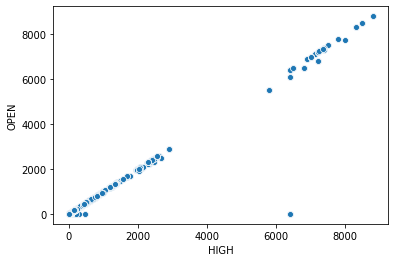

In [106]:
sn.scatterplot(x=d['HIGH'],y=result)

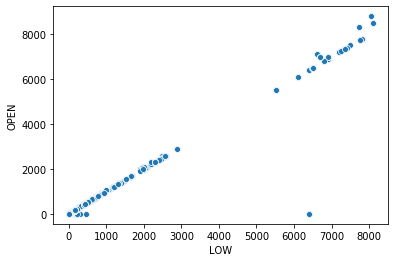

In [107]:
sn.scatterplot(x=d['LOW'],y=result)

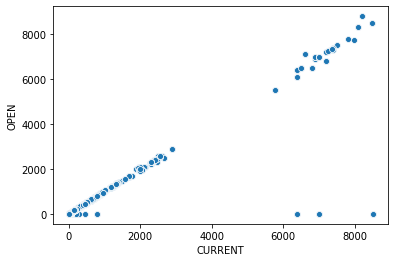

In [109]:
sn.scatterplot(x=d['CURRENT'],y=result)

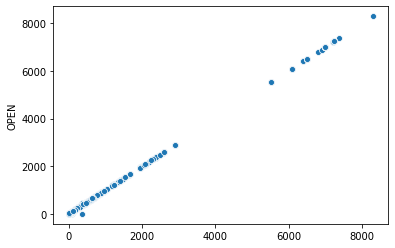

In [165]:
sn.scatterplot(x=p,y=y_test)

In [166]:
url ="https://www.psx.com.pk/market-summary/"

ss = requests.get(url)
print(ss)
obj = BeautifulSoup(ss.content,'lxml')

<Response [200]>


In [167]:
data = obj.findAll("div",{"class":"table-responsive"})

In [168]:
da = obj.find_all('td')

In [207]:
da[48]

<td>140.00</td>

In [217]:
open_index = 40
open_values = []
for i in range(open_index,3569):
    open_values.append(da[open_index])
    open_index = open_index + 8
    

IndexError: list index out of range

In [215]:
open_values

[<td>6.95</td>,
 <td>7.29</td>,
 <td>6.74</td>,
 <td>6.80</td>,
 <td> <span class="increase-rate"></span> .01</td>,
 <td>235,000</td>,
 <td>Ghandhara Industries Ltd. </td>,
 <td>139.00</td>,
 <td>140.00</td>,
 <td>140.5</td>,
 <td>132.05</td>,
 <td>132.09</td>,
 <td> <span class="decrease-rate"></span> -6.91</td>,
 <td>467,000</td>,
 <td>Ghandhara Nissan Ltd. </td>,
 <td>79.71</td>,
 <td>78.50</td>,
 <td>79.7</td>,
 <td>75.73</td>,
 <td>75.76</td>,
 <td> <span class="decrease-rate"></span> -3.95</td>,
 <td>736,000</td>,
 <td>Ghani Automobile Industries Ltd. </td>,
 <td>4.81</td>,
 <td>4.70</td>,
 <td>4.88</td>,
 <td>4.55</td>,
 <td>4.57</td>,
 <td> <span class="decrease-rate"></span> -.24</td>,
 <td>17,000</td>,
 <td>Hino Pak Motor Limeted. </td>,
 <td>476.70</td>,
 <td>470.00</td>,
 <td>470.01</td>,
 <td>457</td>,
 <td>457.02</td>,
 <td> <span class="decrease-rate"></span> -19.68</td>,
 <td>900</td>,
 <td>Honda Atlas Cars (Pak) Ltd. </td>,
 <td>211.31</td>,
 <td>210.00</td>,
 <td>211<

In [208]:
len(da)

3574

In [213]:
da[3568]

<td>14.85</td>